# Non Linear Classification using SVM(Concentric Cicles Example is taken)

1)Import Libraries nedded for this .

2)Load the sample data which has data points arranged so that they make circles, and add noise value to introduce overlapping 
or outliers

3)Plot them and observe the non linear relationship

4)For this example the concetric Circles can be solved by adding or introducing new feature x3 = x1^2 + x2^2

5)Defining a Phi function to transform the 2 dimension data to 3dimension data

6)Plot the data and now observe the prolems are seprated and a plane can be made for classification

7)Lets compare this model with LogisticRegression and compare both accuracies when data is 2d and 3d

8)Lets Draw the equation of the plane and have the final wording.

In [1]:
import numpy as np      #Used  to make arrays 
from sklearn.datasets import make_circles  #To load Datset
import matplotlib.pyplot as plt          #To Plot the samples
from mpl_toolkits.mplot3d import Axes3D as ax  #To plot 3d view

In [2]:
X,Y=make_circles(n_samples=500,noise=0.05)   #Some noise to make some outliers
print(X.shape,Y.shape) 

(500, 2) (500,)


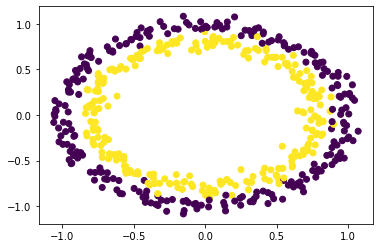

In [3]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [4]:
def phi(X):
    X1=X[:,0]
    X2=X[:,1]
    X3=X1**2+X2**2  #3rd Feature made
    
    X_=np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1]=X
    X_[:,-1]=X3
    
    return X_
    
    
    

In [5]:
X_=phi(X)   #Transformation from 2d data to 3d data

(500, 3)


In [6]:
X_[:3,:]

array([[ 0.4968622 , -0.65843698,  0.6804113 ],
       [-1.05939068, -0.08240539,  1.12909926],
       [-1.0515781 , -0.0149966 ,  1.10604139]])

In [7]:
def plot3d(X,Y,show=True):
    fig=plt.figure(figsize=(10,10))
    ax=fig.add_subplot(111,projection='3d')
    X1=X[:,0]
    X2=X[:,1]
    X3=X[:,2]
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    ax.view_init(180, 360)  # Setting the angl for better visualization
    if show==True:
        plt.show()
    return ax

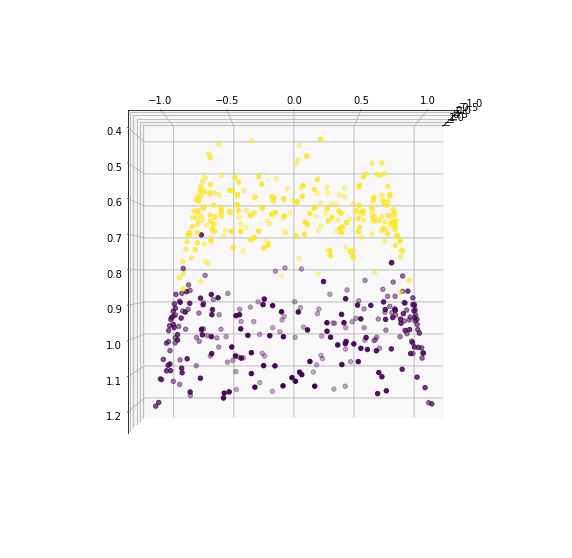

In [8]:
plot3d(X_,Y)  #U can observe the data is now separated

In [9]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score

In [10]:
lr=LR()

In [11]:
acc=cross_val_score(lr,X,Y,cv=5).mean() # Accuracy with the 2d data
acc=cross_val_score(lr,X_,Y,cv=5).mean() # Accuracy with the 3d data
print(acc)
lr.fit(X_,Y)
w=lr.coef_
bi=lr.intercept_

0.966


In [12]:
print(w,bi)

[[ -0.06241241  -0.06182507 -10.28160809]] [8.32218785]


In [13]:
a=w[0][0]
b=w[0][1]  #Defining coeeficents and constants to make plane equation ax+by+cz+d=0
c=w[0][2]
print(a,b,c)

-0.062412406769124344 -0.061825067875915976 -10.281608088576526


In [14]:
d=bi
d

array([8.32218785])

In [15]:
xx,yy=np.meshgrid(range(-2,2),range(-2,2))
print(xx)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]


In [16]:
zz=-1*(a*xx+b*yy+d)/c
print(zz)

[[0.83359166 0.82752137 0.82145107 0.81538078]
 [0.82757849 0.8215082  0.8154379  0.8093676 ]
 [0.82156532 0.81549503 0.80942473 0.80335443]
 [0.81555215 0.80948186 0.80341156 0.79734126]]


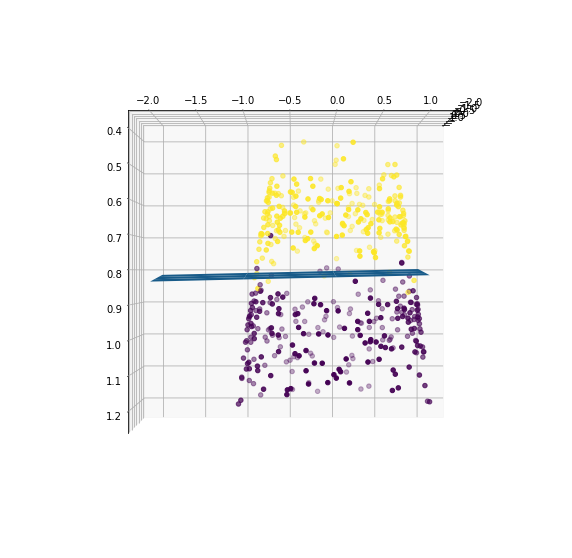

In [17]:
ax=plot3d(X_,Y,False)
ax.plot_surface(xx,yy,zz,alpha=1)
plt.show() # That slight line observed is the plane for separation